### 1. Import libraries and read the dataset

In [1]:
# Import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the provided dataset
df = pd.read_csv("space_missions1.csv")

In [3]:
# Show 5 first rows in the dataset
df.head(5)

,Company,Location,Year,Time,Rocket,MissionStatus,RocketStatus,Price,Mission
0,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",1997,NaN,VLS-1,0,Retired,NaN,SCD-2A
1,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",1999,1899-12-30 19:40:00,VLS-1,0,Retired,NaN,SACI-2
2,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",2003,NaN,VLS-1,0,Retired,NaN,"SATEC, UNOSAT"
3,AMBA,"LA-5B, RAAF Woomera Range Complex, Australia",1967,NaN,Redstone Sparta,1,Retired,NaN,WRESAT
4,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958,1899-12-30 03:48:00,Juno I,1,Retired,NaN,Explorer 1


### 2. Explore data 

In [4]:
# Dimensionality of the data
df.shape

(4626, 9)

We can now know that there are 4626 rows and 9 columns in the dataset.

In [5]:
# General information of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        4626 non-null   object 
 1   Location       4626 non-null   object 
 2   Year           4626 non-null   int64  
 3   Time           4501 non-null   object 
 4   Rocket         4626 non-null   object 
 5   MissionStatus  4626 non-null   int64  
 6   RocketStatus   4626 non-null   object 
 7   Price          1264 non-null   float64
 8   Mission        4626 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 325.4+ KB


In [6]:
# Distribution of the numerical values
df.describe()

,Year,MissionStatus,Price
count,4626.000000,4626.000000,1264.000000
mean,1989.611760,0.899265,128.407437
std,19.373522,0.301010,256.848149
min,1957.000000,0.000000,2.000000
25%,1973.000000,1.000000,30.000000
50%,1987.000000,1.000000,63.000000
75%,2007.000000,1.000000,116.250000
max,2022.000000,1.000000,5000.000000


The observation can tell several information about data:

* Total samples are 4626 in the above columns, no missing values. 

* The MissionStatus column contains 0 or 1 values.

* The Price fluctuates as high as 5000 and as low as 2.

* The data was collected from 1957 to 2022.


In [7]:
# Distribution of the categorical variables
df.describe(include=['O'])

,Company,Location,Time,Rocket,RocketStatus,Mission
count,4626,4626,4501,4626,4626,4626
unique,62,158,1300,370,2,4555
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",1899-12-30 12:00:00,Cosmos-3M (11K65M),Retired,DSP
freq,1777,251,52,446,3618,8


In [8]:
# Check if any missing values in the file
df.isnull().sum()

Company             0
Location            0
Year                0
Time              125
Rocket              0
MissionStatus       0
RocketStatus        0
Price            3362
Mission             0
dtype: int64

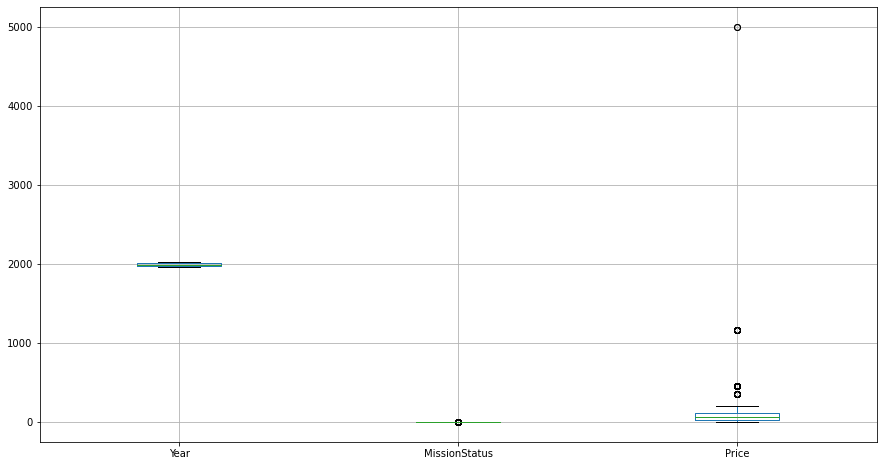

In [9]:
# Plot the box plot to see generally the outlier points in columns 
%matplotlib inline
bp = df.boxplot(figsize=(15,8))

In [10]:
# Calculate the lower and upper bounds for outliers
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Extract outliers from the DataFrame
outliers_df = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]

# Display the outlier values
outliers_df

,Company,Location,Year,Time,Rocket,MissionStatus,RocketStatus,Price,Mission
477,Boeing,"SLC-37B, Cape Canaveral AFS, Florida, USA",2004,1899-12-30 21:50:00,Delta IV Heavy,0,Active,350.0,DemoSat and 3CS-1 & 2
1699,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1967,1899-12-30 12:00:00,Saturn V,1,Retired,1160.0,Apollo 4
1700,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1968,1899-12-30 12:00:00,Saturn V,0,Retired,1160.0,Apollo 6
1701,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1968,1899-12-30 12:51:00,Saturn V,1,Retired,1160.0,Apollo 8
1702,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969,1899-12-30 13:32:00,Saturn V,1,Retired,1160.0,Apollo 11
...,...,...,...,...,...,...,...,...,...
4125,ULA,"SLC-37B, Cape Canaveral SFS, Florida, USA",2020,1899-12-30 01:09:00,Delta IV Heavy,1,Active,350.0,NROL-44
4212,ULA,"SLC-6, Vandenberg AFB, California, USA",2011,1899-12-30 21:10:00,Delta IV Heavy,1,Active,350.0,NROL-49
4214,ULA,"SLC-6, Vandenberg AFB, California, USA",2013,1899-12-30 18:03:00,Delta IV Heavy,1,Active,350.0,NROL-65
4217,ULA,"SLC-6, Vandenberg AFB, California, USA",2019,1899-12-30 19:10:00,Delta IV Heavy,1,Active,350.0,NROL-71


In this section, we are exploring outlier values in the dataset by calculating upper quantile and lower quantile. The outliers will be identified if there values are out of the lower and upper range. After writing codes, there are 164 rows supposed to be outliers in this current dataset. 

In [11]:
# Check if any duplicated values in the dataset
df.duplicated().sum()

0

### 3. Data Visualisation

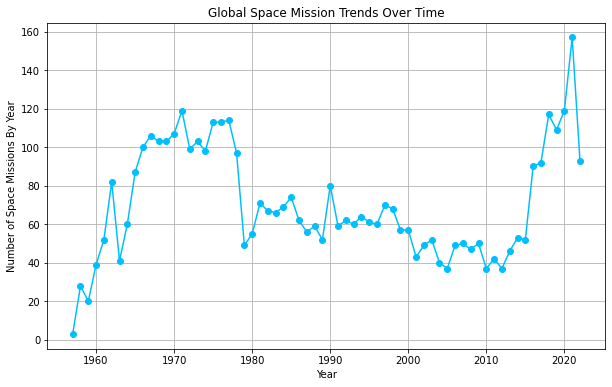

In [12]:

# Convert the 'Year' column to a datetime object with the 'Year' format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Group the data by year and count the number of missions per year
missions_per_year = df.groupby(df['Year'].dt.year)['Year'].count()

# Create a line plot using matplotlib
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(missions_per_year.index, missions_per_year.values, marker='o', linestyle='-', color='deepskyblue')
plt.title('Global Space Mission Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Space Missions By Year')
plt.grid(True)
plt.show()


The line graph presents a comprehensive overview of global space mission trends over the years, revealing noteworthy patterns and milestones. From the graph, we observe a steady growth in the number of space missions conducted globally over the past few decades, reflecting the increasing interest and investment in space exploration.The graph highlights a peak in the number of missions during the late 1960s, 1970s which corresponds to the historic Apollo moon landings and also during 2020s. 

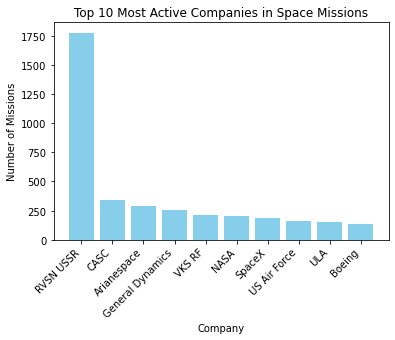

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
most_active_companies = pd.DataFrame(df)

# Get the top 10 most active companies and their mission counts
most_active_companies = df['Company'].value_counts().nlargest(10).reset_index()
most_active_companies.columns = ['Company', 'Number of Missions']

# Sort values in the column 
most_active_companies = most_active_companies.sort_values(by='Number of Missions', ascending=False)

# Create a bar plot using Matplotlib
plt.bar(most_active_companies['Company'], most_active_companies['Number of Missions'], color='skyblue')
plt.title('Top 10 Most Active Companies in Space Missions')
plt.xlabel('Company')
plt.ylabel('Number of Missions')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


The bar chart offers valuable insights into the landscape of space missions, highlighting the companies that have played pivotal roles in advancing space exploration. RVSN USSR secures the top position, signifying its historical significance in space missions. CASC, Arianespace, General Dynamics, VKS RF, NASA, SpaceX, US Air Force, ULA, Boeing achieved mainly similar values. The chart highlights the vibrant and competitive nature of the space industry, where various organizations collaborate and compete to achieve milestones in space exploration.

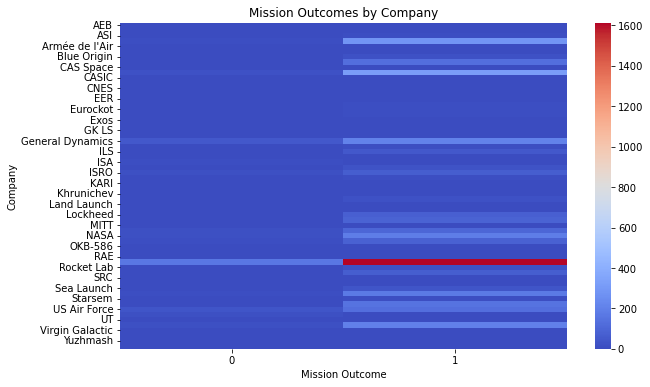

In [14]:

# Pivot the data to create a table of mission outcomes by company
company_mission_outcomes = df.pivot_table(index='Company', columns='MissionStatus', 
                                          values='Mission', aggfunc='count', fill_value=0)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(company_mission_outcomes, cmap='coolwarm', fmt='d')

plt.title('Mission Outcomes by Company')
plt.xlabel('Mission Outcome')
plt.ylabel('Company')

plt.show()


The heatmap displays the mission outcomes of each company. The darker colour presents higher numbers of outcomes achieved by the company, and the lighter colour presents lower numbers of outcomes achieved by the company. We can see that RVSN USSR company got the highest mission results, with 1614. Most of companies got a small number of mission outcomes, with lower than 10 results. In addition, three companies achieved good outcomes, with higher than 200, inlcuding Galactic Energy, CASC, Arianespace. 

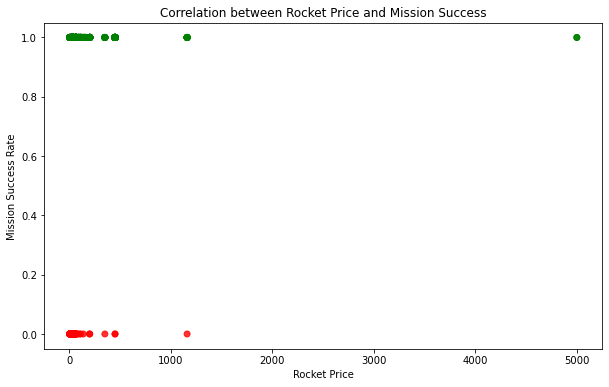

In [15]:

# Create a customized scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
colors = df['MissionStatus'].map({1: 'green', 0: 'red'})
plt.scatter(df['Price'], df['MissionStatus'], c=colors, alpha=0.8)

plt.title('Correlation between Rocket Price and Mission Success')
plt.xlabel('Rocket Price')
plt.ylabel('Mission Success Rate')

# Customize the layout
plt.grid(False)

# Show the plot
plt.show()
